# Question 01
-  Delivery_time -> Predict delivery time using sorting time 

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("delivery_time.csv")

In [3]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# EDA and Data Visualization

In [4]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


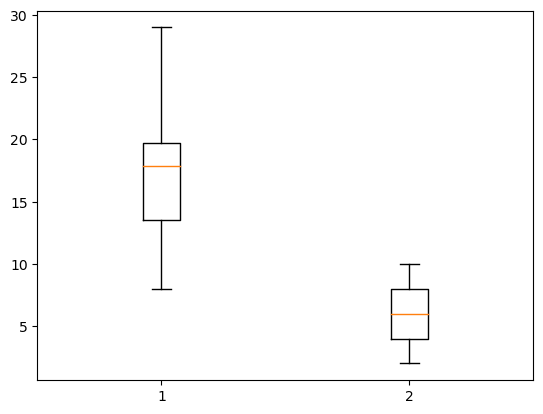

In [5]:
plt.boxplot(df)
plt.show()

<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

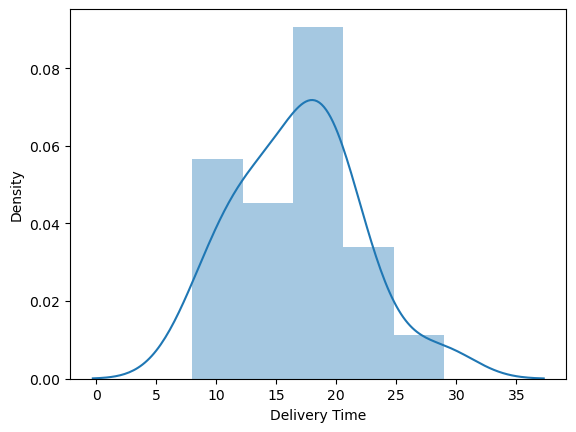

In [6]:
sns.distplot(df['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

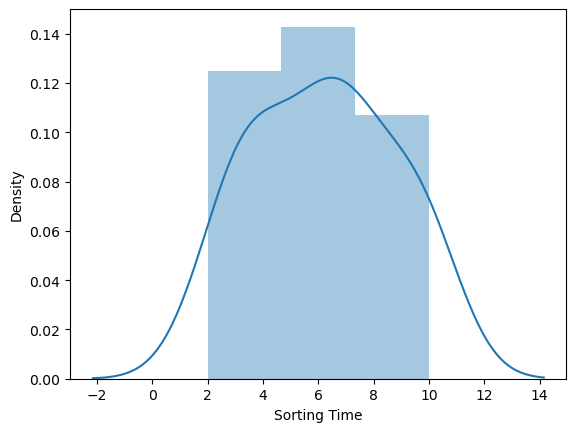

In [7]:
sns.distplot(df["Sorting Time"])

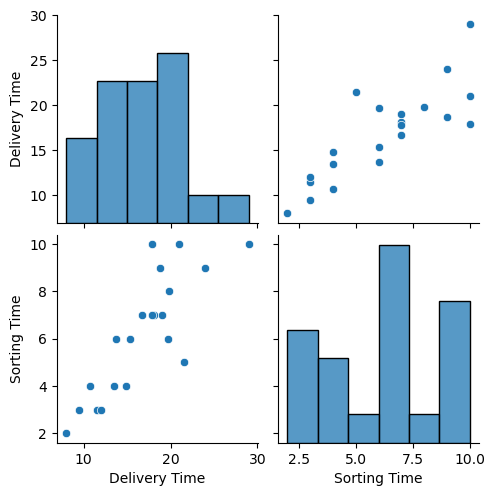

In [8]:
sns.pairplot(df)

In [9]:
df["Delivery Time"].skew()

0.3523900822831107

In [10]:
df['Sorting Time'].skew()

0.047115474210530174

# sqrt transformation

In [11]:
df = np.sqrt(df)

In [12]:
df.head()

,Delivery Time,Sorting Time
0,4.582576,3.162278
1,3.674235,2.000000
2,4.444097,2.449490
3,4.898979,3.000000
4,5.385165,3.162278


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

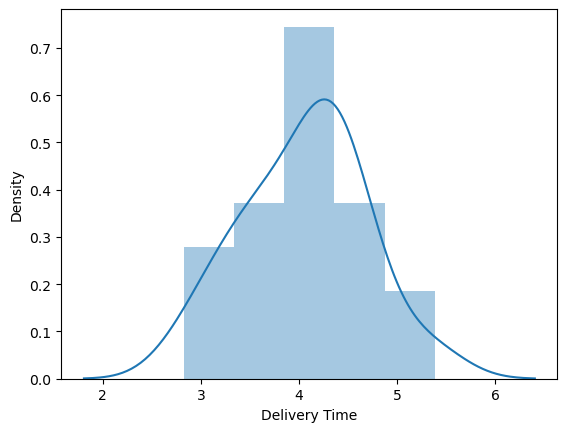

In [14]:
sns.distplot(df['Delivery Time'])

In [15]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.853933
Sorting Time,0.853933,1.000000


<AxesSubplot:>

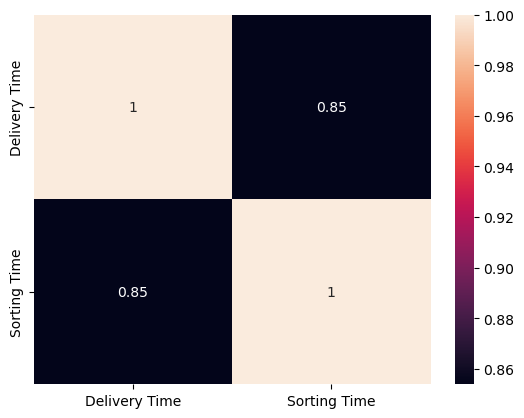

In [16]:
sns.heatmap(df.corr(),annot=True)

In [17]:
df["Delivery Time"].skew()

-0.0618105135865213

In [18]:
df['Sorting Time'].skew()

-0.25981634723613994

In [19]:
df.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [20]:
# Rename Function
df = df.rename({"Delivery Time":"Delivery_Time","Sorting Time":"Sorting_Time"},axis=1)

# Model building

In [21]:
import statsmodels.formula.api as smf

In [22]:
model = smf.ols("Delivery_Time~Sorting_Time",data=df).fit()

In [23]:
#Model parameters

In [24]:
model.params

Intercept       1.613479
Sorting_Time    1.002217
dtype: float64

In [25]:
model.rsquared

0.7292011987544664

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     51.16
Date:                Sun, 12 Mar 2023   Prob (F-statistic):           8.48e-07
Time:                        14:25:23   Log-Likelihood:                -5.7320
No. Observations:                  21   AIC:                             15.46
Df Residuals:                      19   BIC:                             17.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.6135      0.349      4.628      0.000       0.884       2.343
Sorting_Time     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
#Prediction for Delivery Time

In [28]:
NewData = pd.Series([10,15])
Data_Pred = pd.DataFrame(NewData,columns=["Sorting_Time"])
Data_Pred

,Sorting_Time
0,10
1,15


In [29]:
model.predict(Data_Pred)

0    11.635647
1    16.646732
dtype: float64

# Question 02
- Salary_hike -> Build a prediction model for Salary_hike

In [30]:
Sal = pd.read_csv("Salary_Data.csv")

In [31]:
Sal

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [32]:
Sal.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [33]:
Sal['YearsExperience'].skew()

0.37956024064804106

In [34]:
Sal["Salary"].skew()

0.35411967922959153

# sqrt transformation

In [36]:
Sal = np.sqrt(Sal)

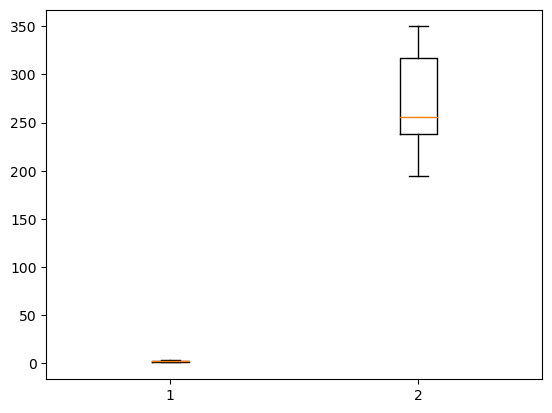

In [37]:
plt.boxplot(Sal)
plt.show()

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

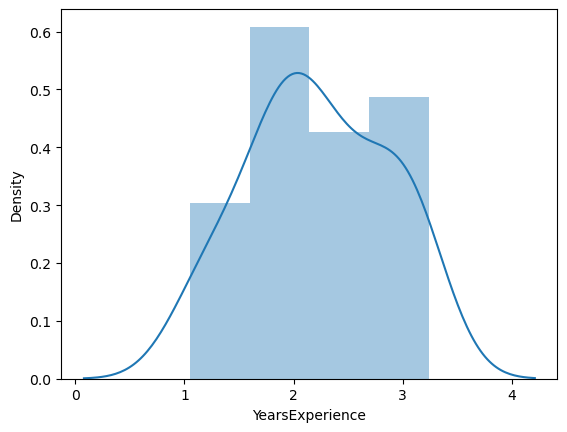

In [38]:
sns.distplot(Sal['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

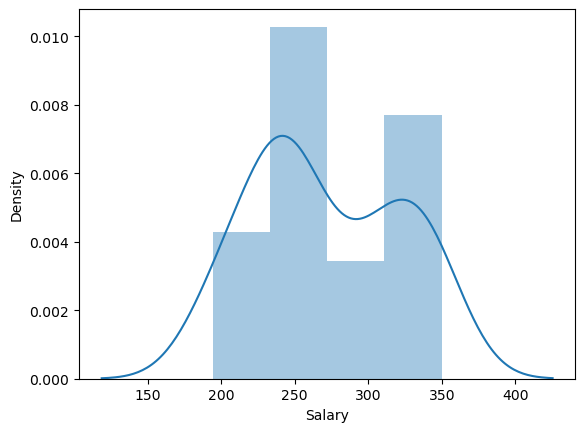

In [39]:
sns.distplot(Sal['Salary'])

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

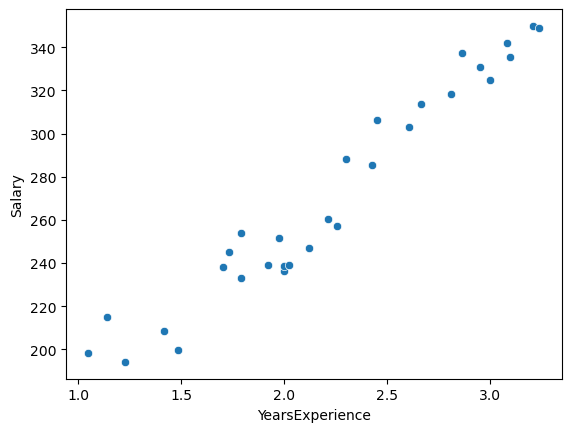

In [40]:
sns.scatterplot(Sal['YearsExperience'],Sal["Salary"])

In [41]:
Sal["YearsExperience"].skew()

-0.04919608394250605

In [42]:
Sal["Salary"].skew()

0.16904336802767353

In [43]:
Sal.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.970541
Salary,0.970541,1.000000


In [44]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [45]:
sc = StandardScaler()

In [46]:
Sal1 = pd.DataFrame(sc.fit_transform(Sal),columns=Sal.columns)

In [47]:
Sal1

,YearsExperience,Salary
0,-1.866121,-1.494456
1,-1.720324,-1.154455
2,-1.585373,-1.578541
3,-1.283030,-1.284023
4,-1.172882,-1.466265
5,-0.822299,-0.682581
6,-0.775844,-0.533923
7,-0.685200,-0.778037
8,-0.685200,-0.357701
9,-0.470279,-0.659104


In [48]:
import statsmodels.formula.api as smf

In [49]:
modelSal = smf.ols("Salary~YearsExperience",data = Sal).fit()

In [50]:
#Model parameters

In [51]:
modelSal.params

Intercept          103.568031
YearsExperience     75.626932
dtype: float64

In [52]:
modelSal.rsquared

0.9419490138976825

In [53]:
modelSal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Sun, 12 Mar 2023   Prob (F-statistic):           7.58e-19
Time:                        14:25:54   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         103.5680      8.178     12.663      0.000      86.815     120.321
YearsExperience    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
#line equation
x = 10.5
y = 1.64*x + 6.58
y

23.799999999999997

In [55]:
newdata=pd.Series([7,10.5])
data_pred =pd.DataFrame(newdata,columns=["YearsExperience"])
data_pred

,YearsExperience
0,7.0
1,10.5


In [56]:
modelSal.predict(data_pred)

0    632.956554
1    897.650816
dtype: float64